In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv(r'D:/data_science/Research/GroundTruthJSONlog_2.csv')

In [41]:
df.head()

,type,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,pos_noise__001,pos_noise__002,pos_noise__003,spd__001,spd__002,spd__003,spd_noise__001,spd_noise__002,spd_noise__003
0,4,10800.065710,25,0,38,3594.503928,5822.136692,1.895,0.0,0.0,0.0,-0.020621,-35.392890,0.0,0.0,0.0,0.0
1,4,10800.241039,37,0,63,3588.387672,6003.151424,1.895,0.0,0.0,0.0,2.733597,36.816215,0.0,0.0,0.0,0.0
2,4,10800.361496,13,2,88,3584.615626,5891.170606,1.895,0.0,0.0,0.0,1.817582,42.584663,0.0,0.0,0.0,0.0
3,4,10800.502533,43,0,109,3822.766368,5266.901172,1.895,0.0,0.0,0.0,1.118316,-0.847054,0.0,0.0,0.0,0.0
4,4,10800.521696,31,0,130,3820.685635,5264.333061,1.895,0.0,0.0,0.0,0.885788,-0.529247,0.0,0.0,0.0,0.0


In [42]:
df.drop(['type','pos_noise__001','pos_noise__002','pos_noise__003','spd_noise__001','spd_noise__002','spd_noise__003','spd__003'],axis = 1, inplace = True)

In [43]:
x = df[['time','sender','messageID','pos__001','pos__002','pos__003','spd__001','spd__002']]
y = df.iloc[:,2:3].values

In [44]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [45]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [48]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.24%


[[257   3]
 [  1 267]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'Random Forest')

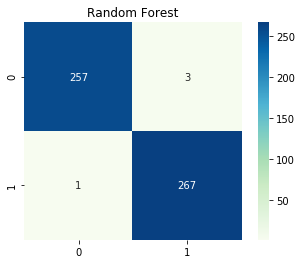

In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('Random Forest')

In [50]:
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       260
           2       0.99      1.00      0.99       268

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528



[0.96 0.11 0.01 0.86 0.97 0.98 0.98 0.98 0.98 1.   0.01 0.   1.   0.03
 0.   0.01 0.87 1.   0.02 0.   1.   0.08 0.07 1.   0.98 1.   0.99 0.
 0.   0.   0.81 0.97 0.08 0.97 1.   0.99 0.9  0.   0.01 0.01 0.07 0.
 0.99 1.   1.   0.93 0.   0.98 0.96 0.   0.01 0.   0.94 1.   0.   1.
 0.   0.94 1.   0.99 0.   1.   0.   0.79 0.01 0.   0.97 0.   0.82 0.
 0.03 0.   1.   0.   0.   0.   1.   0.   0.98 1.   0.1  0.   0.   0.95
 0.   1.   0.98 0.29 1.   0.   1.   0.   0.92 0.   1.   0.   1.   0.01
 0.   0.   1.   0.18 0.99 0.   0.05 0.16 0.94 1.   0.   0.95 1.   0.77
 0.44 0.95 0.   0.95 0.06 1.   0.   1.   0.   1.   0.01 1.   1.   0.
 1.   1.   0.97 0.9  1.   0.   1.   1.   0.06 1.   1.   0.94 0.97 0.92
 1.   1.   0.2  0.06 0.01 0.   0.98 0.   1.   0.99 0.   0.99 0.   0.
 0.06 1.   1.   0.03 1.   0.97 0.01 0.03 0.97 0.01 0.02 0.01 0.94 1.
 1.   0.98 0.   0.01 0.92 1.   1.   0.   0.02 0.88 0.85 0.92 0.   1.
 0.93 1.   0.   0.01 0.99 1.   0.   1.   1.   1.   1.   1.   1.   0.94
 0.99 0.93 0.02 0.   0

C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


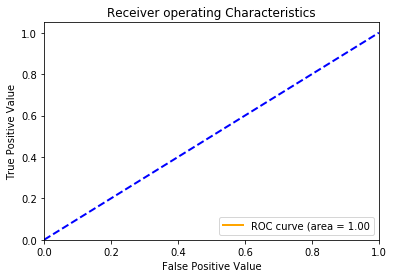

In [51]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,4])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()